# CVR prediction

In [ ]:
!pip install ppscore

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.sample(3)

,accepts_mercadopago,available_quantity,avg_gmv_item_domain_30days,avg_gmv_item_sel,avg_gmv_seller_bday,avg_qty_orders_item_domain_30days,avg_qty_orders_item_sel_30days,avg_si_item_sel_30day,benefit,boosted,...,total_orders_sel_30days,total_si_domain_30days,total_si_item_30days,total_si_sel_30days,total_visits_domain,total_visits_item,total_visits_seller,uid,user_id,warranty
128617,True,40,191.589292,224.301526,1420.576333,3.317125,4.010526,8.284211,0.001,False,...,762.0,3438.0,21.0,1574.0,353082,4185,61884,6c828918-4ff1-437b-a866-d2a501123e32,287158472.0,Garantía de fábrica: 99 años
92292,True,955,192.748361,368.332881,724.388000,2.278689,3.542373,3.881356,0.001,False,...,209.0,878.0,27.0,229.0,178397,1350,27518,e60f6f83-b9bf-4bf6-bcff-4767b76743cb,NaN,Sí
141368,True,263,1013.901797,8848.796216,10913.515333,3.619656,26.243243,26.729730,0.000,False,...,971.0,58125.0,8.0,989.0,8003689,266,33169,24e5b304-56a7-4009-a352-4d6a6dc30537,355256541.0,Garantía de fábrica: 12 meses


In [4]:
train.shape

(180761, 56)

In [5]:
train.columns

Index(['accepts_mercadopago', 'available_quantity',
       'avg_gmv_item_domain_30days', 'avg_gmv_item_sel', 'avg_gmv_seller_bday',
       'avg_qty_orders_item_domain_30days', 'avg_qty_orders_item_sel_30days',
       'avg_si_item_sel_30day', 'benefit', 'boosted', 'category_id',
       'conversion', 'date', 'deal_print_id', 'domain_id', 'etl_version',
       'free_shipping', 'fulfillment', 'full_name', 'health', 'is_pdp',
       'product_id', 'item_id', 'listing_type_id', 'logistic_type',
       'main_picture', 'offset', 'original_price', 'platform', 'price',
       'print_position', 'print_server_timestamp', 'qty_items_dom',
       'qty_items_sel', 'site_id', 'sold_quantity', 'tags', 'title',
       'total_asp_item_domain_30days', 'total_asp_item_sel_30days',
       'total_gmv_domain_bday', 'total_gmv_item_30days', 'total_items_domain',
       'total_items_seller', 'total_orders_domain_30days',
       'total_orders_item_30days', 'total_orders_sel_30days',
       'total_si_domain_30days

In [6]:
train.describe()

,available_quantity,avg_gmv_item_domain_30days,avg_gmv_item_sel,avg_gmv_seller_bday,avg_qty_orders_item_domain_30days,avg_qty_orders_item_sel_30days,avg_si_item_sel_30day,benefit,health,product_id,...,total_orders_domain_30days,total_orders_item_30days,total_orders_sel_30days,total_si_domain_30days,total_si_item_30days,total_si_sel_30days,total_visits_domain,total_visits_item,total_visits_seller,user_id
count,180761.000000,176837.000000,176837.000000,176837.000000,176837.000000,176837.000000,176837.000000,180760.000000,180761.000000,4.289900e+04,...,176837.000000,176837.000000,176837.000000,176837.000000,176837.000000,176837.000000,1.807610e+05,180761.000000,1.807610e+05,1.612270e+05
mean,2074.535442,331.489834,1122.382439,10842.085465,4.375018,13.402640,18.165970,0.000976,0.809567,1.230187e+07,...,22346.620798,65.429135,3960.473125,29545.227238,89.288045,5261.887857,2.197788e+06,5653.601518,2.566183e+05,2.247744e+08
std,11235.369560,487.421765,4047.858620,26544.425783,2.770781,25.249710,33.342219,0.000154,0.147008,3.105051e+06,...,30446.480267,131.724559,5173.071895,50569.429428,226.963258,6839.221779,3.567731e+06,12433.292058,3.477934e+05,1.474363e+08
min,0.000000,4.909057,4.773333,0.660000,1.000000,1.000000,1.000000,0.000000,0.000000,7.140000e+02,...,4.000000,1.000000,2.000000,4.000000,1.000000,2.000000,3.160000e+02,1.000000,1.100000e+01,1.610000e+02
25%,18.000000,86.462920,143.683548,797.772000,2.870177,4.185072,4.916055,0.001000,0.770000,9.377732e+06,...,3149.000000,6.000000,723.000000,4006.000000,7.000000,962.000000,1.956490e+05,410.000000,4.818000e+04,1.054202e+08
50%,67.000000,168.752898,263.348400,2773.002333,3.635959,6.760114,8.882353,0.001000,0.810000,1.338716e+07,...,8882.000000,20.000000,2112.000000,11808.000000,24.000000,2749.000000,5.671660e+05,1496.000000,1.270040e+05,1.981852e+08
75%,366.000000,316.138036,677.012090,9313.758333,5.028571,13.426471,18.533333,0.001000,0.900000,1.519079e+07,...,24685.000000,63.000000,5037.000000,39732.000000,80.000000,6455.000000,2.012130e+06,5258.000000,2.853890e+05,3.206652e+08
max,99999.000000,3778.257881,57282.961233,244988.442667,38.148629,258.363636,465.500000,0.001000,1.000000,1.570348e+07,...,167184.000000,1853.000000,36492.000000,505258.000000,8269.000000,56189.000000,1.591114e+07,195413.000000,2.938795e+06,1.000014e+09


In [7]:
train.isnull().sum()

accepts_mercadopago                       0
available_quantity                        0
avg_gmv_item_domain_30days             3924
avg_gmv_item_sel                       3924
avg_gmv_seller_bday                    3924
avg_qty_orders_item_domain_30days      3924
avg_qty_orders_item_sel_30days         3924
avg_si_item_sel_30day                  3924
benefit                                   1
boosted                                   0
category_id                               0
conversion                                0
date                                      0
deal_print_id                             0
domain_id                                 0
etl_version                               0
free_shipping                             0
fulfillment                               0
full_name                                 0
health                                    0
is_pdp                                81266
product_id                           137862
item_id                         

In [ ]:
pps.matrix(train.loc[:, [x for x in train.columns if x not in ['warranty', 'user_id', 'title', 'tags']]])

## Página de producto

In [8]:
train.is_pdp.value_counts()

False    98892
True       603
Name: is_pdp, dtype: int64

In [25]:
train.is_pdp.isnull().sum()

81266

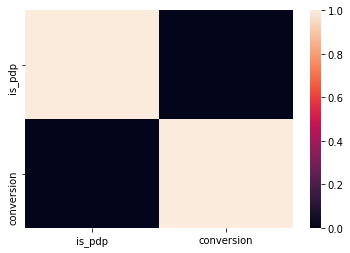

In [19]:
import seaborn as sns
pdp_conversion = train.loc[:, ['is_pdp', 'conversion']]
sns.heatmap(pps.matrix(pdp_conversion));

In [32]:
print(f"""
Las pdp tienen {(100 * (~train.is_pdp.isnull()).sum() / train.shape[0]):.2f}% de completados
Y del total {(100 * train.is_pdp.sum() / train.shape[0]):.2f}% son efectivamente pdp (true)
Las pdp tienen un promedio muestral en la conversion de {(100 * (train.is_pdp & train.conversion).sum() / train.is_pdp.sum()):.2f}%
Para las páginas que no son de pdp, se tiene un promedio muestral de conversión de {(100 * ((train.is_pdp == False) & train.conversion).sum() / (train.is_pdp == False).sum()):.2f}
""")


Las pdp tienen 55.04% de completados
Y del total 0.33% son efectivamente pdp (true)
Las pdp tienen un promedio muestral en la conversion de 35.16%
Para las páginas que no son de pdp, se tiene un promedio muestral de conversión de 16.72



Aunque vemos que en promedio las pdp tienen mayor conversión, vemos totalmente desbalanceada la clase, y es posible que esta información en sí misma podría estar embebida dentro de otras variables como la categoría. De momento para un primer approach descartamos utilizar esta variable como predictor de la conversión.

## Datos referentes al ítem y el seller en promedio

In [33]:
avg_item_seller = [
    'avg_gmv_item_domain_30days',
    'avg_gmv_item_sel',
    'avg_gmv_seller_bday',
    'avg_qty_orders_item_domain_30days',
    'avg_qty_orders_item_sel_30days',
    'avg_si_item_sel_30day'
]

In [35]:
train_avg = train.loc[:, avg_item_seller + ['conversion']]

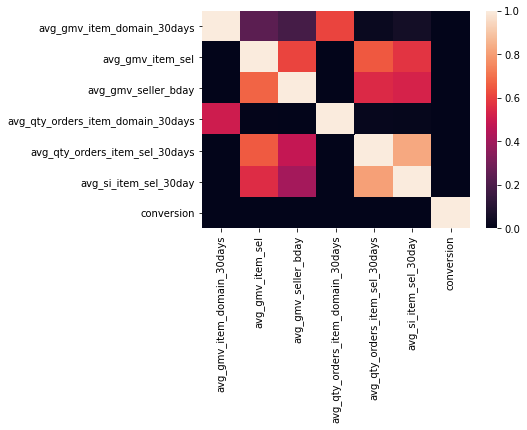

In [36]:
sns.heatmap(pps.matrix(train_avg))

In [55]:
pps.matrix(train_avg).conversion

avg_gmv_item_domain_30days           0
avg_gmv_item_sel                     0
avg_gmv_seller_bday                  0
avg_qty_orders_item_domain_30days    0
avg_qty_orders_item_sel_30days       0
avg_si_item_sel_30day                0
conversion                           1
Name: conversion, dtype: int64

In [52]:
corr = train_avg.corr()

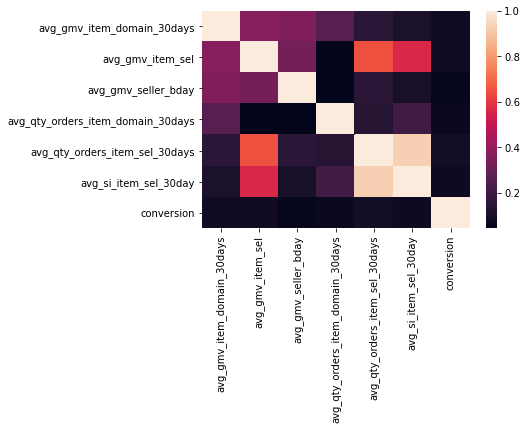

In [53]:
sns.heatmap(corr)

In [54]:
corr['conversion']

avg_gmv_item_domain_30days           0.087146
avg_gmv_item_sel                     0.085516
avg_gmv_seller_bday                  0.057562
avg_qty_orders_item_domain_30days    0.066549
avg_qty_orders_item_sel_30days       0.091836
avg_si_item_sel_30day                0.077111
conversion                           1.000000
Name: conversion, dtype: float64

In [38]:
train[~train.avg_gmv_item_domain_30days.isnull()].isnull().sum()

accepts_mercadopago                       0
available_quantity                        0
avg_gmv_item_domain_30days                0
avg_gmv_item_sel                          0
avg_gmv_seller_bday                       0
avg_qty_orders_item_domain_30days         0
avg_qty_orders_item_sel_30days            0
avg_si_item_sel_30day                     0
benefit                                   1
boosted                                   0
category_id                               0
conversion                                0
date                                      0
deal_print_id                             0
domain_id                                 0
etl_version                               0
free_shipping                             0
fulfillment                               0
full_name                                 0
health                                    0
is_pdp                                79159
product_id                           135489
item_id                         

In [39]:
train[~train.avg_gmv_item_domain_30days.isnull()].shape

(176837, 56)

Estas variables no presentan de momento una fuerta relación con la variable objetivo y los datos faltantes representan una muy pequeña parte del total. En el paso anterior vimos que dropeando los nulls de estas columnas, estaríamos tambien dropeando nulls en las demás (al menos en la mayoría de ellas).

## Datos referentes al dominio, item en total

In [41]:
total_vars = [
    'total_asp_item_domain_30days',
    'total_asp_item_sel_30days',
    'total_gmv_domain_bday',
    'total_gmv_item_30days',
    'total_items_domain',
    'total_items_seller',
    'total_orders_domain_30days',
    'total_orders_item_30days',
    'total_orders_sel_30days',
    'total_si_domain_30days',
    'total_si_item_30days',
    'total_si_sel_30days',
    'total_visits_domain',
    'total_visits_item',
    'total_visits_seller'
]

In [44]:
corr = train.loc[:, total_vars + ['conversion']].corr()
scorem = pps.matrix(train.loc[:, total_vars + ['conversion']])

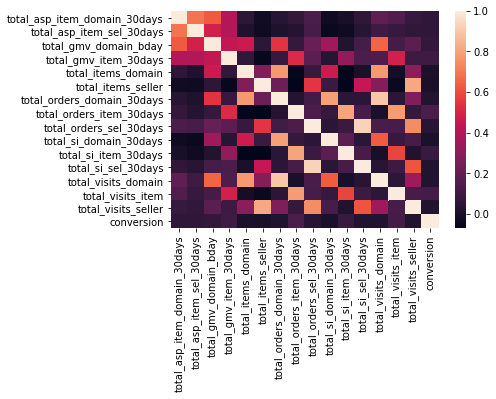

In [45]:
sns.heatmap(corr)

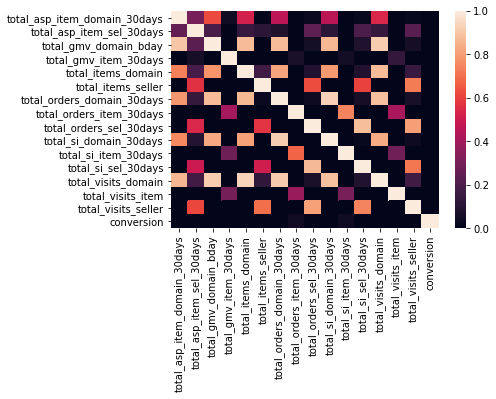

In [46]:
sns.heatmap(scorem)

In [51]:
corr['conversion']

total_asp_item_domain_30days    0.062507
total_asp_item_sel_30days       0.063720
total_gmv_domain_bday           0.075498
total_gmv_item_30days           0.107730
total_items_domain              0.009169
total_items_seller              0.002878
total_orders_domain_30days      0.027164
total_orders_item_30days        0.139590
total_orders_sel_30days         0.043699
total_si_domain_30days          0.009342
total_si_item_30days            0.093048
total_si_sel_30days             0.029855
total_visits_domain             0.028091
total_visits_item               0.122701
total_visits_seller             0.030180
conversion                      1.000000
Name: conversion, dtype: float64